In [1]:
import numpy as np
import pandas as pd
import sys,os,json
from collections import Counter

sys.path.insert(1, '/home/chacoma/librerias/python')
from plotter_lib import *

db = '/home/chacoma/Lineas/football_4/data/'

In [2]:
# index (segundo) donde comienza en 2do tiempo en los 3 partidos
tPer2 = {0:2851, 1:2718, 2:2803}

In [3]:
# tomo los datos de los equipos que ganaron los partidos

arx =db+'Sample_Game_1/X_DS1_raw.json' 
d = json.load(open(arx,'r'))
G0= np.array(d["1"])
del(d)

arx =db+'Sample_Game_2/X_DS2_raw.json' 
d = json.load(open(arx,'r'))
G1= np.array(d["1"])
del(d)

arx =db+'Sample_Game_3/X_DS3_raw.json' 
d = json.load(open(arx,'r'))
G2= np.array(d["2"])
del(d)

G= [G0,G1,G2]



In [4]:
G0

array([[[ 9.31000000e-02,  3.27430200e+01],
        [ 3.41718125e+01,  4.36626017e+01],
        [ 3.52167812e+01,  3.30027233e+01],
        ...,
        [ 4.75272875e+01,  1.33011683e+01],
        [ 5.54075812e+01,  2.44660883e+01],
        [ 5.79528687e+01,  2.81981267e+01]],

       [[ 1.18440000e-02,  3.26726128e+01],
        [ 3.37785420e+01,  4.11250944e+01],
        [ 3.46521420e+01,  3.18458688e+01],
        ...,
        [ 4.64093700e+01,  1.06763264e+01],
        [ 5.50562460e+01,  1.97415968e+01],
        [ 5.67273000e+01,  2.57312000e+01]],

       [[-7.98000000e-03,  3.26587680e+01],
        [ 3.33821880e+01,  3.87533360e+01],
        [ 3.42975360e+01,  3.12199152e+01],
        ...,
        [ 4.53599580e+01,  9.00570240e+00],
        [ 5.36993520e+01,  1.66855680e+01],
        [ 5.43526200e+01,  2.47155792e+01]],

       ...,

       [[ 9.93061860e+01,  3.00026608e+01],
        [ 3.75134760e+01,  4.42520880e+01],
        [ 3.34128060e+01,  4.47978288e+01],
        ...,
     

In [116]:
P= [] 

for i,g in enumerate(G):
    
    print (i)
    
    T = len(g)
    
    Pi =[]
    
    for t in range(T-1):

        V = g[t+1]-g[t]
        u=0

        N = len(V)

        for n in range(N):
    
            vnorm = np.linalg.norm(V[n])
    
            if vnorm:
                u += V[n]/vnorm


        Pi.append( np.linalg.norm(u)/(1.0*N) )
    
    
    #---------------
    P.append(Pi)
    
        

0
1
2


In [115]:
P[0]

[0.9393953159876997,
 0.5993313505385786,
 0.3570588851510464,
 0.8935501654583065,
 0.8866169359681336,
 0.8523309550920177,
 0.8612462432460645,
 0.862897102491899,
 0.8851895406511968,
 0.8159511510730373,
 0.8817787341308118,
 0.8729129104454775,
 0.7042701586467919,
 0.3148485825284387,
 0.44101711766659957,
 0.4266286837707085,
 0.8818473223937849,
 0.9543659623947973,
 0.7353920874812903,
 0.34850529441267847,
 0.43415125219029566,
 0.44330761344015895,
 0.880803749402392,
 0.9582953703616384,
 0.9581550304845071,
 0.9419019629074451,
 0.8557394229499953,
 0.8106314460548337,
 0.7396528581936671,
 0.5687843877365788,
 0.15743327692109352,
 0.46631187432615406,
 0.8675779458892383,
 0.9505809661158917,
 0.980242327749597,
 0.9692620752624681,
 0.9476270112135061,
 0.9266479207299553,
 0.8397677227861041,
 0.49800753001778353,
 0.8022645348670526,
 0.5858655335338212,
 0.5010500632462036,
 0.8476168598706972,
 0.8744856361501906,
 0.2901102506126825,
 0.8204657221100551,
 0.961713

0.649247023526081 0.2464547533713116
0.6764043218764167 0.24965255182665844
0.6130990280102241 0.23629797325428395


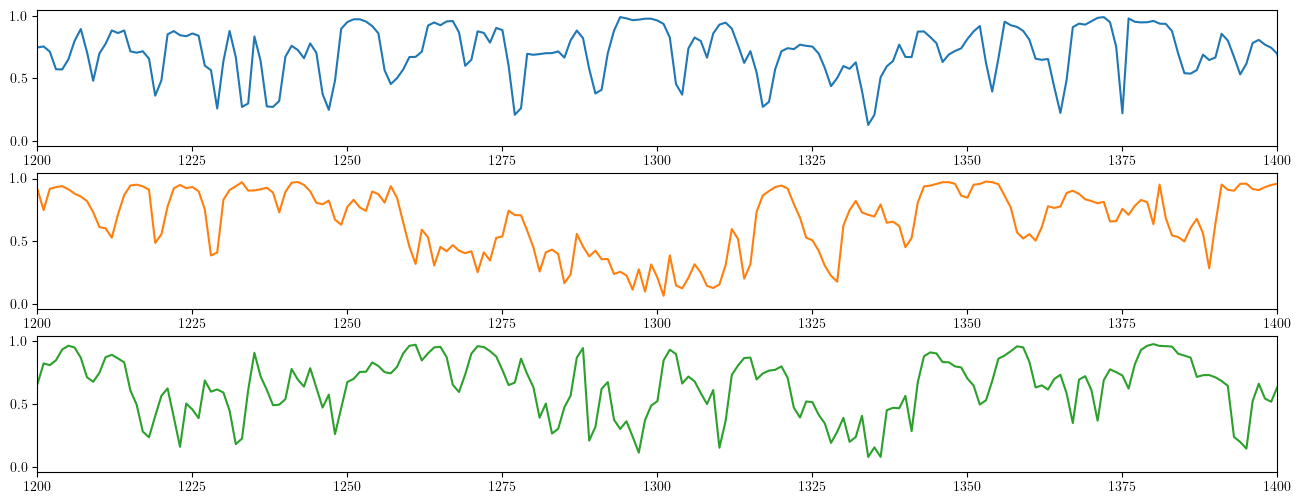

In [123]:
x = np.arange( 0,T-1,1 )


fig, ax = plt.subplots(3,1,figsize=(16,6))

for i in [0,1,2]:
    ax[i].plot(np.arange( 0,len(P[i]),1 ), P[i], c='C%d'%i)
    
    print (np.mean(P[i]), np.std(P[i]))


t1=1200


ax[0].set_xlim(t1,t1+200)
ax[1].set_xlim(t1,t1+200)
ax[2].set_xlim(t1,t1+200)

plt.show()

In [125]:
t = min( len(P[0]),len(P[1]) )

np.corrcoef(P[0][:t],P[1][:t])

array([[1.        , 0.04492271],
       [0.04492271, 1.        ]])

<h1> Quiero ver cantidad de goles y quien gano

In [100]:
arx = db+"Sample_Game_1/Sample_Game_1_RawEventsData.csv"

df = pd.read_csv(arx)

df.head(20)

,#Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,#Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,Player19,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,0.45,0.39,0.55,0.43
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,0.55,0.43,0.58,0.21
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,0.55,0.19,0.45,0.31
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,0.45,0.32,0.49,0.47
5,Away,PASS,NaN,1,191,7.64,217,8.68,Player21,Player22,0.40,0.73,0.32,0.98
6,Away,PASS,NaN,1,279,11.16,303,12.12,Player22,Player17,0.39,0.96,0.49,0.98
7,Away,BALL LOST,INTERCEPTION,1,346,13.84,380,15.20,Player17,NaN,0.51,0.97,0.27,0.75
8,Home,RECOVERY,INTERCEPTION,1,378,15.12,378,15.12,Player2,NaN,0.27,0.78,NaN,NaN
9,Home,BALL LOST,INTERCEPTION,1,378,15.12,452,18.08,Player2,NaN,0.27,0.78,0.59,0.64


In [101]:
Counter(df.Subtype).most_common()

[(nan, 953),
 ('INTERCEPTION', 290),
 ('THEFT', 44),
 ('HEAD', 37),
 ('TACKLE-WON', 37),
 ('FREE KICK', 32),
 ('TACKLE-LOST', 29),
 ('THROW IN', 28),
 ('AERIAL-WON', 27),
 ('GROUND-WON', 26),
 ('AERIAL-LOST', 22),
 ('GROUND-LOST', 21),
 ('GOAL KICK', 17),
 ('TACKLE-FAULT-LOST', 17),
 ('TACKLE-FAULT-WON', 16),
 ('CROSS-INTERCEPTION', 14),
 ('CORNER KICK', 11),
 ('CLEARANCE', 11),
 ('GROUND-FAULT-WON', 10),
 ('OFF TARGET-OUT', 9),
 ('GROUND-FAULT-LOST', 8),
 ('SAVED', 7),
 ('KICK OFF', 6),
 ('GROUND', 6),
 ('HEAD-INTERCEPTION', 5),
 ('CROSS', 5),
 ('GOAL KICK-INTERCEPTION', 5),
 ('ON TARGET-SAVED', 5),
 ('AERIAL-FAULT-LOST', 4),
 ('AERIAL-FAULT-WON', 4),
 ('HEAD-CLEARANCE', 4),
 ('YELLOW', 4),
 ('DEEP BALL', 3),
 ('FORCED', 3),
 ('BLOCKED', 3),
 ('HEAD-OFF TARGET-OUT', 2),
 ('HEAD-ON TARGET-SAVED', 2),
 ('TACKLE-ADVANTAGE-LOST', 2),
 ('TACKLE-ADVANTAGE-WON', 2),
 ('ON TARGET-GOAL', 2),
 ('HEAD-ON TARGET-GOAL', 1),
 ('HEAD-FORCED', 1),
 ('DRIBBLE-WON', 1),
 ('OFFSIDE', 1),
 ('THROUGH BALL

In [66]:
df.loc[(df['Subtype'] == 'ON TARGET-GOAL') | (df['Subtype'] == 'HEAD-ON TARGET-GOAL')]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,0.05,0.55,-0.01,0.53
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,0.92,0.46,1.01,0.48
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,0.95,0.52,1.01,0.53
1671,Away,SHOT,ON TARGET-GOAL,2,115009,4600.36,115024,4600.96,Player20,NaN,0.12,0.52,-0.02,0.54
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,0.79,0.58,1.01,0.54


In [104]:
# para el partido 3, usan otro formato
arx = db+"Sample_Game_3/Sample_Game_3_events.json"

d = json.load(open(arx,'r'))



In [105]:
for event in d["data"]:
    
    S = event["subtypes"]
    
    if S!=None:
        
        if isinstance(S, dict):
        
            #print(event["start"]["time"], S['name'], type(S))
            
            if S['name']=='GOAL':
                print (event, "\n")
                
        else:
            
            for s in S:
                #print(event["start"]["time"], s['name'])
                
                if s['name']=='GOAL':
                    print (event, "\n")
               
            
                
        
        

{'index': 708, 'team': {'name': 'Team B', 'id': 'FIFATMB'}, 'type': {'name': 'SHOT', 'id': 2}, 'subtypes': [{'name': 'ON TARGET', 'id': 28}, {'name': 'GOAL', 'id': 30}], 'start': {'frame': 27525, 'time': 1101, 'x': 0.86504, 'y': 0.56461}, 'end': {'frame': 27544, 'time': 1101.76, 'x': 1.01, 'y': 0.48}, 'period': 1, 'from': {'name': 'Player 27', 'id': 'P3594'}, 'to': None} 

{'index': 1166, 'team': {'name': 'Team A', 'id': 'FIFATMA'}, 'type': {'name': 'RECOVERY', 'id': 3}, 'subtypes': {'name': 'GOAL', 'id': 30}, 'start': {'frame': 44157, 'time': 1766.28, 'x': 0.56844, 'y': 0.60345}, 'end': {'frame': 44157, 'time': 1766.28, 'x': None, 'y': None}, 'period': 1, 'from': {'name': 'Player 9', 'id': 'P3576'}, 'to': None} 

{'index': 2077, 'team': {'name': 'Team B', 'id': 'FIFATMB'}, 'type': {'name': 'SHOT', 'id': 2}, 'subtypes': [{'name': 'ON TARGET', 'id': 28}, {'name': 'GOAL', 'id': 30}], 'start': {'frame': 80761, 'time': 3230.44, 'x': 0.09892, 'y': 0.38335}, 'end': {'frame': 80779, 'time': 3

In [109]:

count=0

for event in d["data"]:
    
    print (event,'\n')
    
    if event['period']==2:
        
        count+=1
        
        if count>2:
            break

{'index': 1, 'team': {'name': 'Team A', 'id': 'FIFATMA'}, 'type': {'name': 'SET PIECE', 'id': 5}, 'subtypes': {'name': 'KICK OFF', 'id': 35}, 'start': {'frame': 361, 'time': 14.44, 'x': None, 'y': None}, 'end': {'frame': 361, 'time': 14.44, 'x': None, 'y': None}, 'period': 1, 'from': {'name': 'Player 10', 'id': 'P3577'}, 'to': None} 

{'index': 2, 'team': {'name': 'Team A', 'id': 'FIFATMA'}, 'type': {'name': 'PASS', 'id': 1}, 'subtypes': None, 'start': {'frame': 361, 'time': 14.44, 'x': 0.50125, 'y': 0.48725}, 'end': {'frame': 377, 'time': 15.08, 'x': 0.49864, 'y': 0.48705}, 'period': 1, 'from': {'name': 'Player 10', 'id': 'P3577'}, 'to': {'name': 'Player 7', 'id': 'P3574'}} 

{'index': 3, 'team': {'name': 'Team A', 'id': 'FIFATMA'}, 'type': {'name': 'CARRY', 'id': 10}, 'subtypes': None, 'start': {'frame': 377, 'time': 15.08, 'x': 0.49864, 'y': 0.48705}, 'end': {'frame': 384, 'time': 15.36, 'x': 0.497, 'y': 0.485}, 'period': 1, 'from': {'name': 'Player 7', 'id': 'P3574'}, 'to': None} 
